<a href="https://colab.research.google.com/github/thejatinbabbar/amazon-multilabel-classification/blob/master/kernel_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

,kernel,gamma,degree,Moons,Classification,Circles,Swiss Roll
0,Classic PCA,NaN,NaN,0.000639,0.001644,0.000637,0.000506
1,linear,1.0,NaN,0.326959,0.325696,0.319742,0.326082
2,rbf,1.0,NaN,0.345683,0.626466,0.375107,0.481192
3,linear,10.0,NaN,0.313628,0.307539,0.323388,0.349039
4,rbf,10.0,NaN,0.363274,0.355955,0.417073,0.507948
5,linear,20.0,NaN,0.311538,0.314353,0.313181,0.328638
6,rbf,20.0,NaN,0.384513,0.380765,0.397380,0.523061
7,poly,1.0,3.0,0.427607,0.537032,0.428410,0.425847
8,poly,10.0,3.0,0.431736,0.538947,0.442320,0.420570
9,poly,20.0,3.0,0.423651,0.527137,0.434796,0.432665


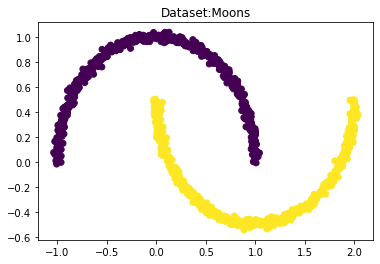

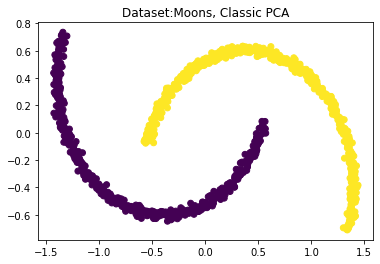

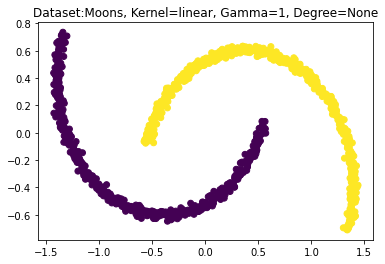

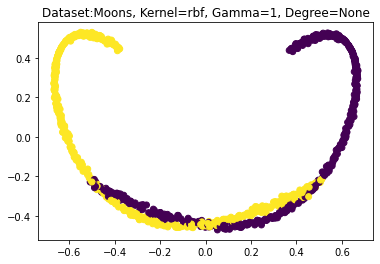

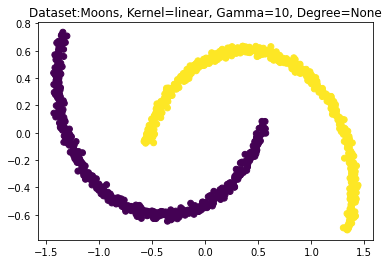

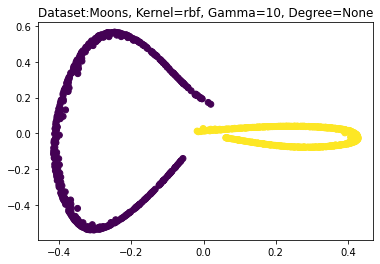

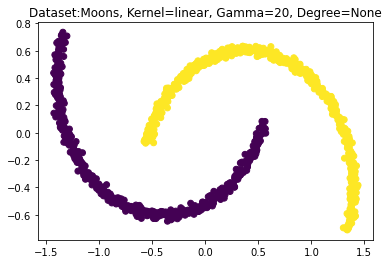

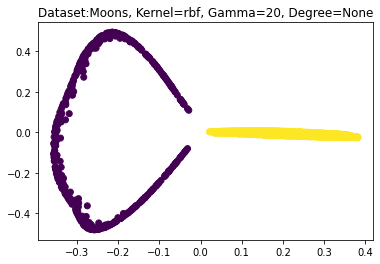

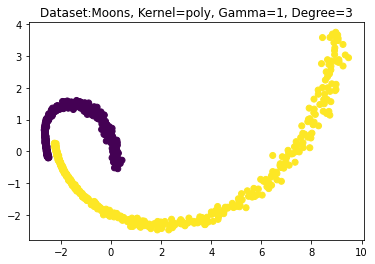

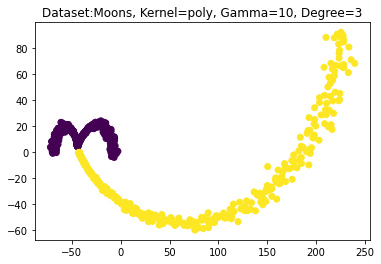

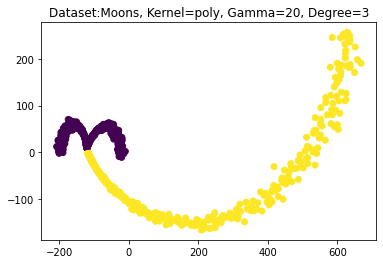

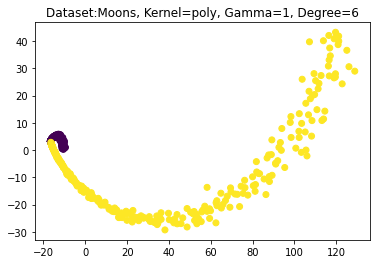

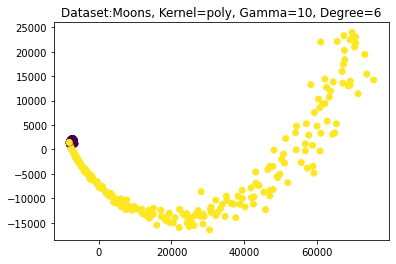

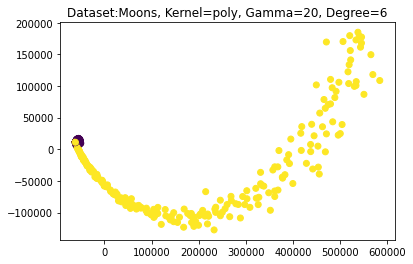

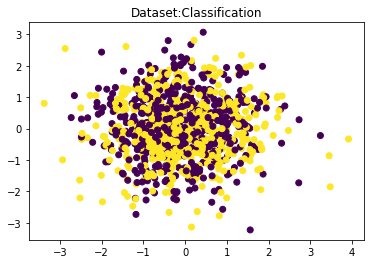

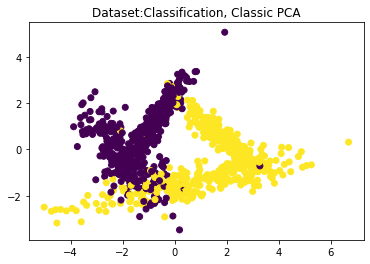

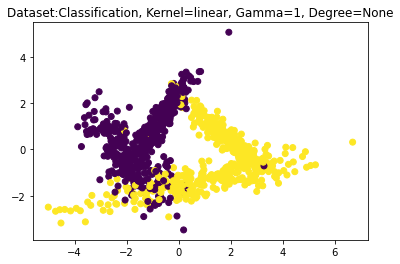

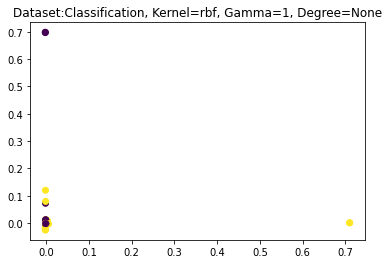

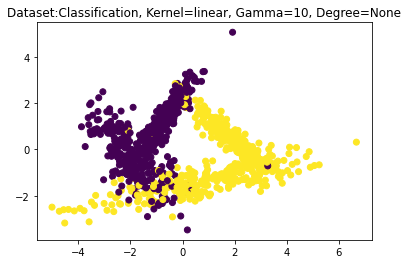

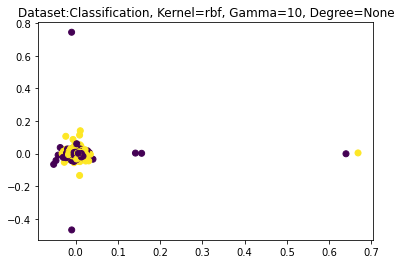

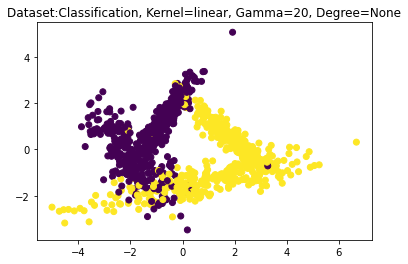

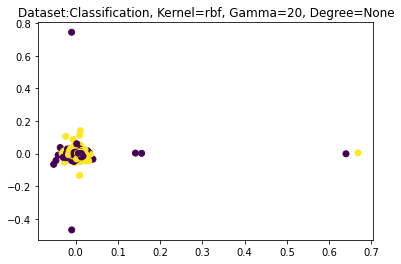

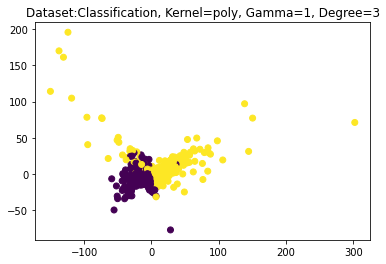

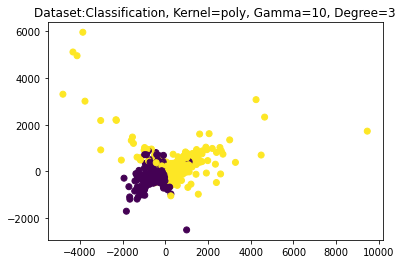

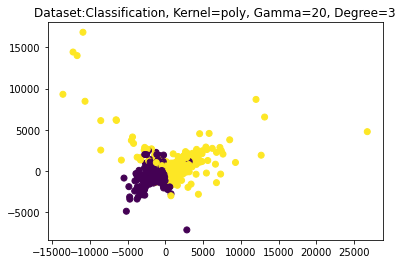

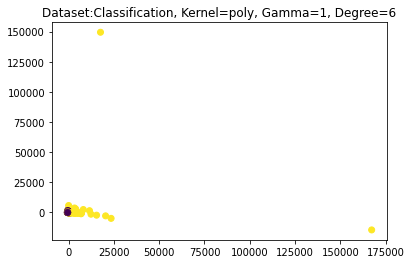

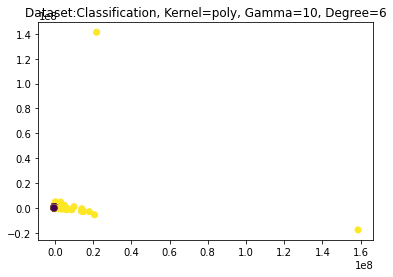

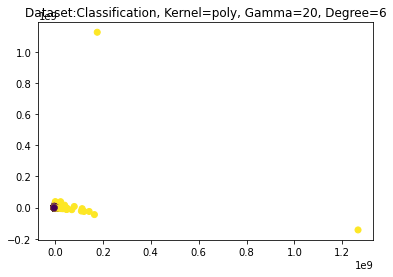

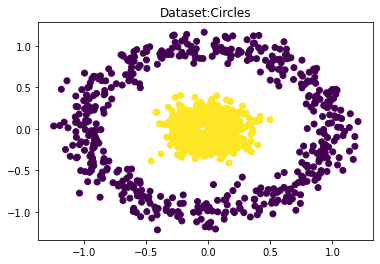

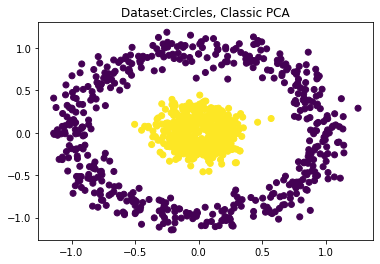

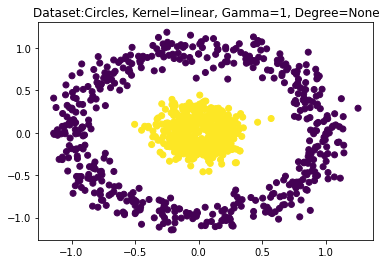

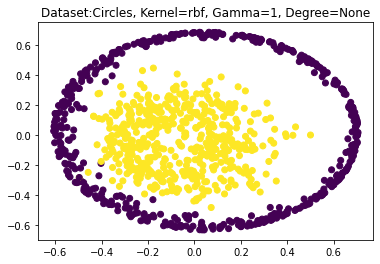

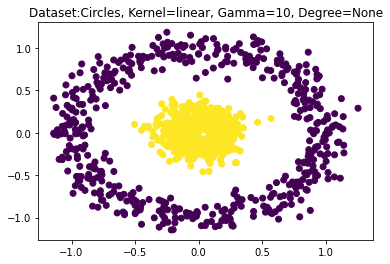

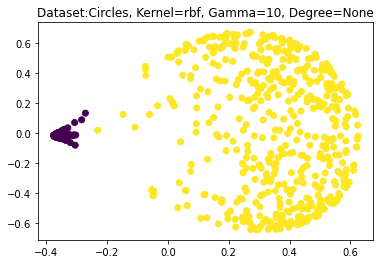

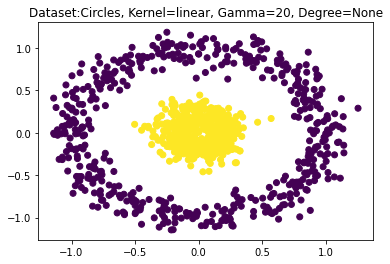

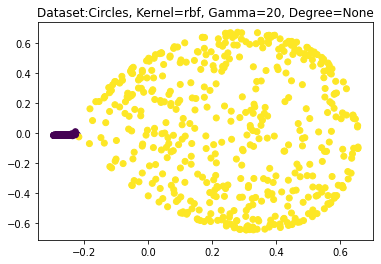

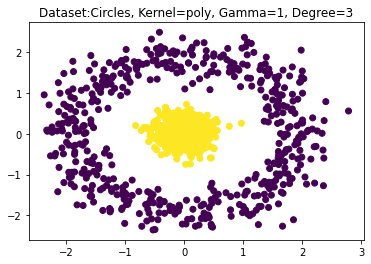

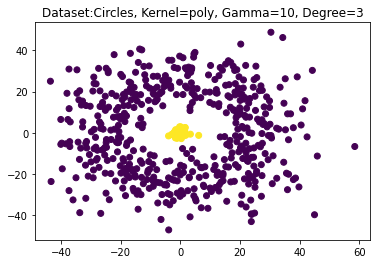

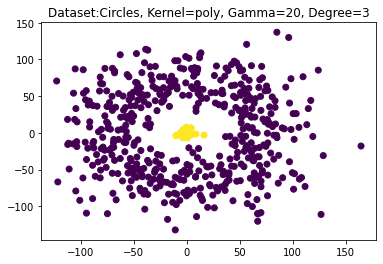

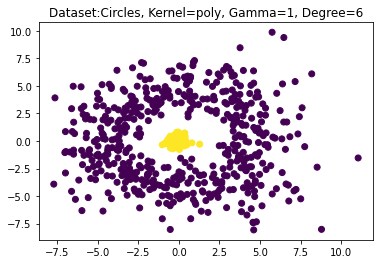

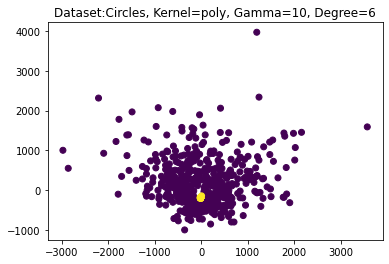

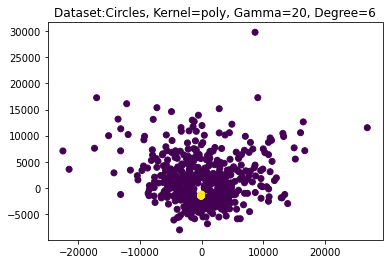

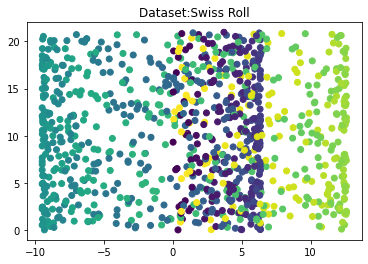

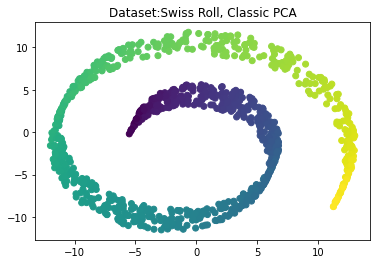

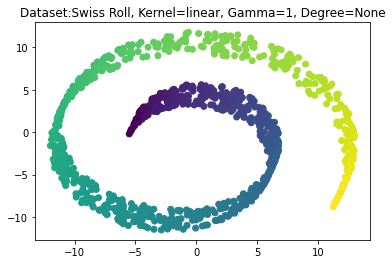

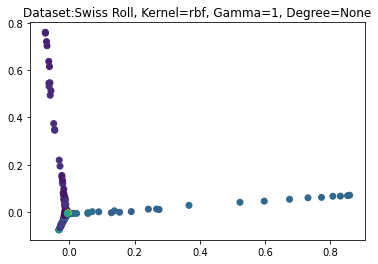

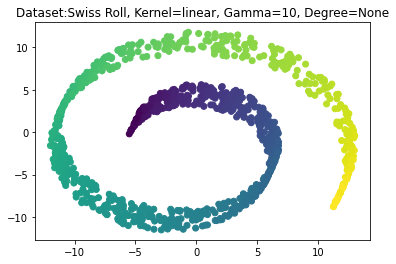

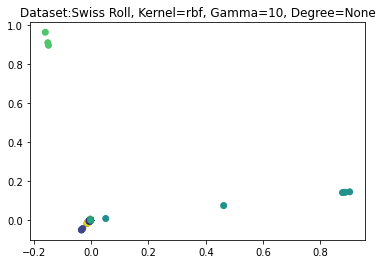

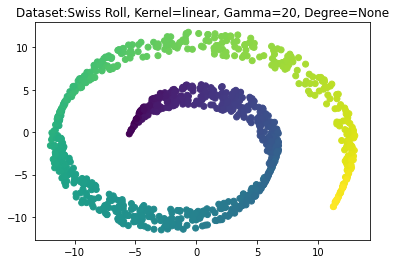

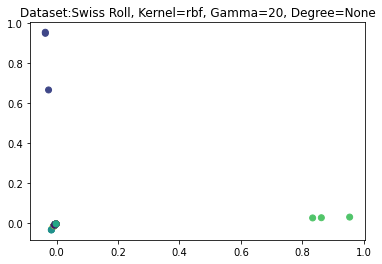

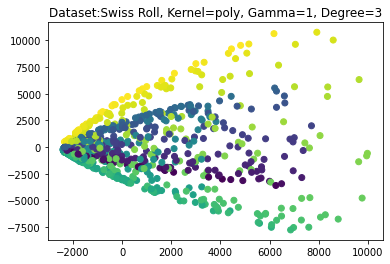

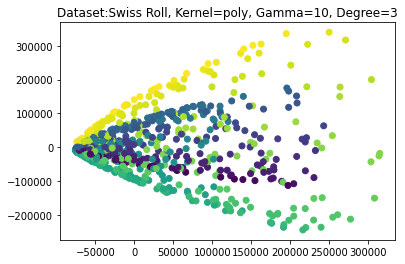

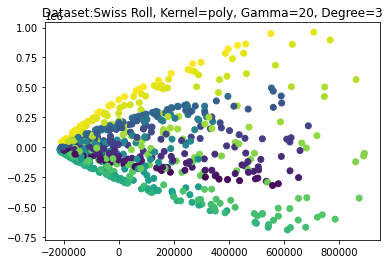

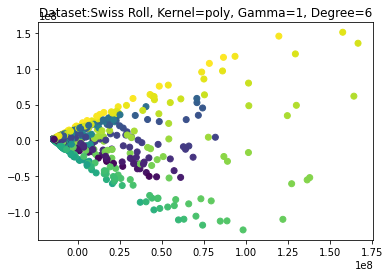

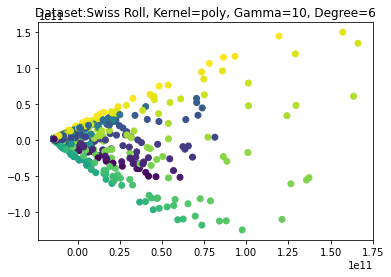

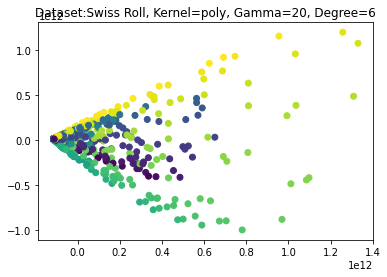

In [15]:
import time
import copy
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import ParameterSampler
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

n_samples = 1000
random_state = 100
moons = datasets.make_moons(n_samples=n_samples, random_state=random_state, noise=0.02)
classification = datasets.make_classification(n_samples=n_samples, random_state=random_state)
circles = datasets.make_circles(n_samples=n_samples, random_state=random_state, noise=0.1, factor=0.2)
swiss_roll = datasets.make_swiss_roll(n_samples=n_samples, random_state=random_state)

all_datasets = [('Moons', moons),
                ('Classification', classification),
                ('Circles', circles),
                ('Swiss Roll', swiss_roll)]

all_params = [{'kernel': 'Classic PCA',
            'gamma': None,
            'degree': None}]

params = {'kernel': ['linear', 'rbf'],
        'gamma': [1, 10, 20],
        'degree': [None]}
params = ParameterSampler(params, n_iter=6)
all_params.extend(list(params))

params = {'kernel': ['poly'],
        'gamma': [1, 10, 20],
        'degree': [3, 6]}
params = ParameterSampler(params, n_iter=6)
all_params.extend(list(params))

all_times = copy.deepcopy(all_params)

for name, dataset in all_datasets:
    
    # get features and labels
    features, labels = dataset
    
    # plot actual dataset
    fig, ax = plt.subplots()
    ax.scatter(features[:,0], features[:,1], c=labels)
    ax.set_title(f'Dataset:{name}')
    fig.savefig(f"images/{name}.png")
    
    # Classic PCA
    start = time.time()
    pca = PCA()
    components = pca.fit_transform(features)
    
    # add calculation time
    stop = time.time() - start
    # all_times.append(all_params[0].copy())
    all_times[0].update({f'{name}': stop})
    
    # plot classic pca
    fig, ax = plt.subplots()
    ax.scatter(components[:,0], components[:,1], c=labels)
    ax.set_title(f'Dataset:{name}, Classic PCA')
    fig.savefig(f'images/{name}_pca.png')

    for i, params in enumerate(all_params[1:], 1):
        # Kernel PCA
        start = time.time()
        kpca = KernelPCA(**params)
        components = kpca.fit_transform(features)

        # add calculation time
        stop = time.time() - start
        # all_times.append(params.copy())
        all_times[i].update({f'{name}': stop})

        # plot kernel pca
        fig, ax = plt.subplots()
        ax.scatter(components[:,0], components[:,1], c=labels)
        ax.set_title(f"Dataset:{name}, Kernel={params['kernel']}, Gamma={params['gamma']}, Degree={params['degree']}")
        fig.savefig(f"images/{name}_{params['kernel']}_{params['gamma']}_{params['degree']}.png")


pd.DataFrame(all_times)